In [1]:
!pip install instaloader
!pip install --upgrade pip


In [2]:
import pandas as pd

Enter your Instagram username:  _rx._lover_
Enter your Instagram password:  jk12345
Enter Instagram usernames to scrape (comma-separated):  ayaanu57


Data saved to instagram_profiles_data.csv


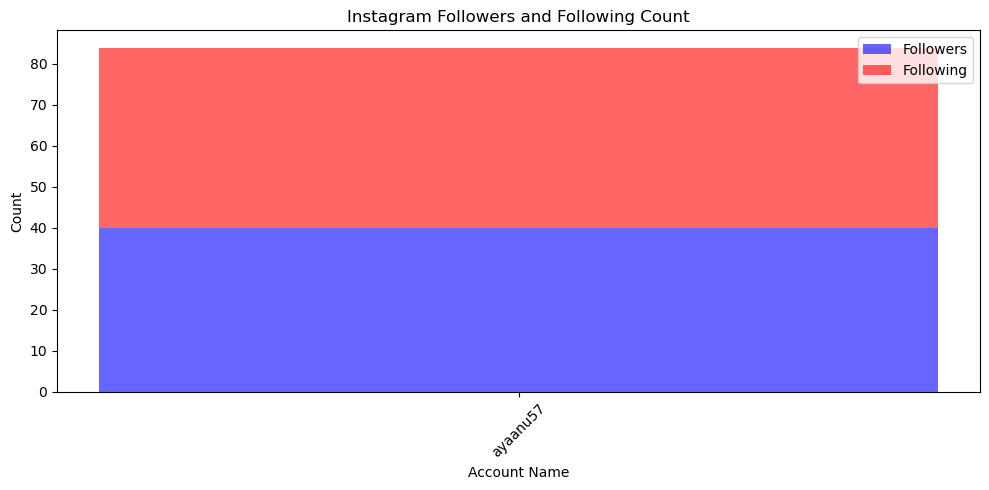

In [5]:
import instaloader
import csv
import matplotlib.pyplot as plt

# Initialize instaloader
L = instaloader.Instaloader()

# Login or load session
username = input("Enter your Instagram username: ")
password = input("Enter your Instagram password: ")

# Login using credentials
L.login(username, password)

# Ask for the Instagram profiles to scrape
profile_usernames = input("Enter Instagram usernames to scrape (comma-separated): ").split(',')

# Prepare data storage
profiles_data = []

for profile_username in profile_usernames:
    # Load profile
    profile = instaloader.Profile.from_username(L.context, profile_username.strip())

    # Collect profile information
    profile_info = {
        "account_name": profile.username,
        "followers_count": profile.followers,
        "following_count": profile.followees,
        "is_private": profile.is_private,
        "is_verified": profile.is_verified
    }

    # Store profile data
    profiles_data.append(profile_info)

# Specify CSV file name
csv_file = "instagram_profiles_data.csv"

# Write to CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=profiles_data[0].keys())
    writer.writeheader()
    writer.writerows(profiles_data)

print(f"Data saved to {csv_file}")

# Extract data for plotting
account_names = [profile['account_name'] for profile in profiles_data]
followers_counts = [profile['followers_count'] for profile in profiles_data]
following_counts = [profile['following_count'] for profile in profiles_data]

# Plot the data
plt.figure(figsize=(10, 5))

plt.bar(account_names, followers_counts, color='b', alpha=0.6, label='Followers')
plt.bar(account_names, following_counts, color='r', alpha=0.6, label='Following', bottom=followers_counts)

plt.xlabel('Account Name')
plt.ylabel('Count')
plt.title('Instagram Followers and Following Count')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [7]:
d = pd.read_csv("instagram_profiles_data.csv")
d

,account_name,followers_count,following_count,is_private,is_verified
0,ayaanu57,40,44,True,False
